In [1]:
!wget 'https://bit.ly/3i4n1QB'

--2021-09-16 13:09:32--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2021-09-16 13:09:32--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 173.194.192.139, 173.194.192.101, 173.194.192.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.192.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2v0429sd8hqttaa3u2ujhe9ujcm5sr4m/1631797725000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download [following]
--2021-09-16 13:09:33--  https://doc-10-10-docs.googleusercontent.com/docs/secur

In [76]:
import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

In [77]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

# set to print result in jupyter notebook
%matplotlib inline

plt.rc('axes', unicode_minus=False)

# hide regardless warning messages
import warnings
warnings.filterwarnings('ignore')

In [78]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [80]:
train.shape

(5497, 14)

In [81]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [82]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [83]:
traindata = train.copy()

# Visualization target variables (Quality of Wine)

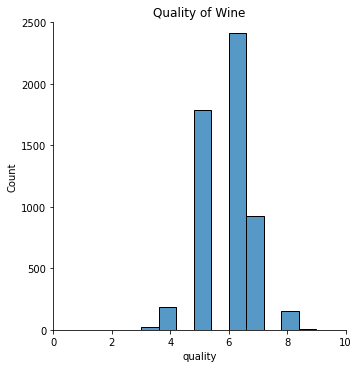

In [84]:
sns.displot(traindata['quality'], kde=False, bins=10) # Kernel Density Estimation = False, bin # of stick = horizontal space
plt.axis([0,10,0,2500]) # [x min, x max, y min, y max]
plt.title("Quality of Wine")
plt.show()

In [85]:
x_val = [0,1,2,3,4]
y_val = [0,1,4,9,16]

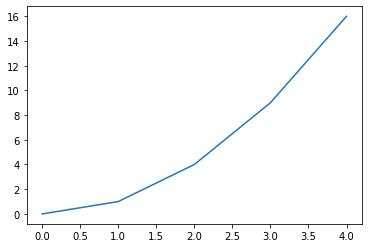

In [86]:
plt.plot(x_val, y_val)
plt.show()

In [87]:
a = [1,1,2,2,3,3,3,4,4,4,4,5,5,5,5,6,7,7]

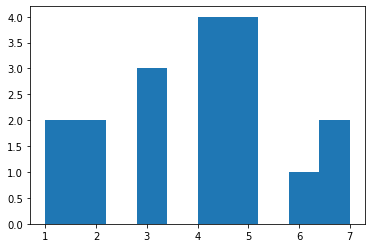

In [88]:
plt.hist(a)
plt.show()

# Preprocessing

## Outlier
일반적인 데이터 패턴과 매우 다른 패턴을 갖는 데이터


## IQR (Inter Qunatile Range)
사분위 값의 편차를 이용
3분위수 (75% 값) - 1분위수(25% 값)

0 --- Q1 --- Q2 --- Q3 --- Q4  
Q1 - Q2 - Q3 => 사분편차

가운데 몰려있는 50% 데이터를 보겠다.

## 그래프 해석
- 박스 위 실선 => 최대값
- 박스 => IQR
- 박스 위선 => Q3
- 박스 중앙선 => M (중앙값)
- 박스 아래선 => Q1
- 박스 아래 실선 => 최소환

ref. https://drhongdatanote.tistory.com/30

## 이상치 제거
최대값 위 or 최소값 아래

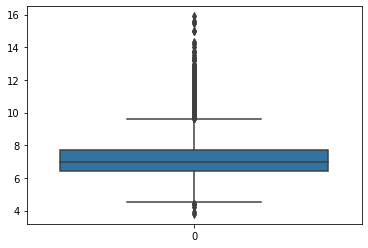

In [89]:
sns.boxplot(data=train['fixed acidity'])

In [90]:
quantile_25 = np.quantile(train['fixed acidity'], 0.25)
quantile_75 = np.quantile(train['fixed acidity'], 0.75)

IQR = quantile_75 - quantile_25

minimum = quantile_25 - 1.5 * IQR
maximum = quantile_75 - 1.5 * IQR

In [91]:
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

In [92]:
train.shape, train2.shape

((5497, 14), (333, 14))

In [93]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [94]:
train2

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
61,61,5,5.6,0.295,0.20,2.20,0.049,18.0,134.0,0.99378,3.21,0.68,10.0,white
77,77,4,5.2,0.405,0.15,1.45,0.038,10.0,44.0,0.99125,3.52,0.40,11.6,white
84,84,5,5.7,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
87,87,7,5.0,0.270,0.32,4.50,0.032,58.0,178.0,0.98956,3.45,0.31,12.6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,5431,7,5.1,0.330,0.22,1.60,0.027,18.0,89.0,0.98930,3.51,0.38,12.5,white
5435,5435,8,5.2,0.440,0.04,1.40,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,white
5455,5455,5,5.1,0.230,0.18,1.00,0.053,13.0,99.0,0.98956,3.22,0.39,11.5,white
5481,5481,7,5.4,0.835,0.08,1.20,0.046,13.0,93.0,0.99240,3.57,0.85,13.0,red


In [95]:
train.shape[0] - train2.shape[0]

5164

## 수치형 데이터 정규화
트리 기반 모델들은 대소 비교를 통해서 구분함으로, 숫자의 단위에 영향이 크지 않음
- decision tree
- random forest

평활 함수 모델 들은 숫자의 크기와 단위에 영향을 많이 받음
- Logistic Regression
- Lasso

## Min Max scaling
가장 작은 값은 0으로, 가장 큰 값은 1로 만듬
사이의 값들은 0~1로 표현됨

In [96]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


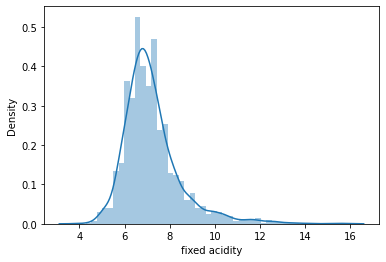

In [97]:
sns.distplot(train['fixed acidity'])

In [98]:
scaler = MinMaxScaler()

scaler.fit(train[['fixed acidity']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [99]:
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])

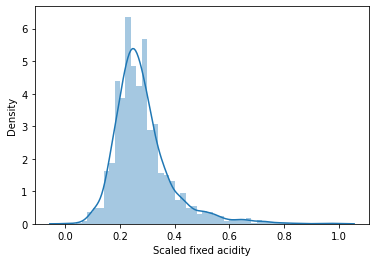

In [100]:
sns.distplot(train['Scaled fixed acidity'])

## ont-hot encoding

해당 되는 값은 1, 나머지는 0  
하나만 1이 아니고 여러개가 1이 된다면 n-hot encoding이라는 표현이 적합  

In [101]:
encoder = OneHotEncoder()

In [102]:
encoder.fit(train[['type']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [103]:
onehot = encoder.transform(train[['type']])
onehot2 = encoder.transform(test[['type']])
onehot

<5497x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5497 stored elements in Compressed Sparse Row format>

In [104]:
onehot = pd.DataFrame(onehot)
onehot2 = pd.DataFrame(onehot2)
onehot.head()

,0
0,"(0, 1)\t1.0"
1,"(0, 0)\t1.0"
2,"(0, 1)\t1.0"
3,"(0, 1)\t1.0"
4,"(0, 1)\t1.0"


In [105]:
onehot = pd.concat([train,onehot], axis=1)
onehot.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,0
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760,"(0, 1)\t1.0"
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223,"(0, 0)\t1.0"
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843,"(0, 1)\t1.0"
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463,"(0, 1)\t1.0"
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579,"(0, 1)\t1.0"


In [106]:
train = train.drop(columns = ['type'])
test = test.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579


# Modeling

In [107]:
random_forest = RandomForestClassifier()
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
X = train.drop(columns = ['quality'])
y = train['quality']

In [109]:
random_forest.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# KFold

## Hold-out
- Train 데이터를 train과 test 두개의 데이터 나누는 작업
- 보통 8:2 또는 7:2로 많이 나눔

### 나누는 이유
예측 성능을 확인 하기 위함  

8:2 로 나눴을 경우, 버려지는 20%의 데이터도 학습에 사용 할 수 있도록 '교차검증' 방법을 이용  

## 예
5개의 데이터로 나눴다고 하면  
Te Tr Tr Tr Tr  
Tr Te Tr Tr Tr  
Tr Tr Te Tr Tr  
Tr Tr Tr Te Tr  
Tr Tr Tr Tr Te  
이런식으로 다섯번의 라운드를 돌림  

각각을 학습하고 예측하고 최빈값을 이용해서 가장 등장 가능성이 높은 결과값을 결정

???
Training - Validation - Testing
???

In [110]:
kf =KFold(n_splits = 5, shuffle = True, random_state = 0)

In [111]:
for train_idx, valid_idx in kf.split(train):
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]

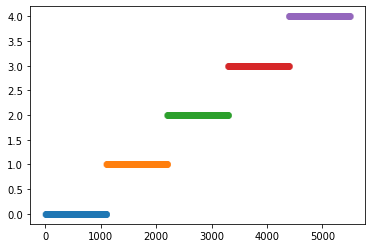

In [112]:
kf = KFold(n_splits = 5, shuffle = False, random_state = 0)
train_idx_store = []
valid_idx_store = []

i=0
for train_idx, valid_idx in kf.split(train):
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1) # alpha transparency
    i += 1
plt.show()

In [113]:

X = train.drop(columns = ['index','quality'])
y = train['quality']

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

model = RandomForestClassifier(random_state = 0)
valid_scores = []
test_predictions = []

In [114]:
for train_idx, valid_idx in kf.split(X,y):
    X_tr = X.iloc[train_idx]
    y_tr = y.iloc[train_idx]

    X_val = X.iloc[valid_idx]
    y_val = y.iloc[valid_idx]

    model.fit(X_tr, y_tr)

    valid_prediction = model.predict(X_val)
    score = accuracy_score(y_val, valid_prediction)
    valid_scores.append(score)
    print(score)
print('avg score : ', np.mean(valid_scores))

0.6854545454545454
0.68
0.654231119199272
0.6624203821656051
0.6642402183803457
avg score :  0.6692692530399535


In [115]:
for train_idx, valid_idx in kf.split(X,y):
    X_tr = X.iloc[train_idx]
    y_tr = y.iloc[train_idx]

    X_val = X.iloc[valid_idx]
    y_val = y.iloc[valid_idx]

    model.fit(X_tr, y_tr)

    test_prediction = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_prediction)

In [116]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,6,6,6,5,6,6,5,6,6,7,6,5,7,6,6,5,6,7,5,5,6,6,5,6,6,5,5,5,5,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,6,7,6,6,5,6,6,6,6,6,5,6,5,5,6,6,5,5,5,6,6,6,5,7,6,6,5,6,6
1,6,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,6,...,5,5,5,5,6,5,5,5,5,7,6,7,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,6,5,5,6,6
2,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,6,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,5,5,6,6,6,6,7,5,6,5,6,6
3,6,6,6,6,6,6,5,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,6,5,7,6,5,5,6,6,5,5,6,6,...,5,5,5,5,6,5,5,6,5,7,6,6,7,7,6,5,7,6,6,6,5,5,6,5,5,6,6,5,6,5,6,6,6,6,7,6,6,5,6,6
4,5,6,6,5,6,6,6,6,6,7,6,6,7,6,6,5,6,6,6,5,6,6,5,7,6,5,5,5,5,5,7,6,5,6,5,6,5,5,6,5,...,5,5,5,5,6,5,5,5,5,7,6,6,7,7,6,5,7,6,6,6,6,6,6,5,5,6,6,5,5,5,6,6,6,6,7,6,6,5,6,7


In [117]:
test_prediction = test_predictions.mode()
test_prediction = test_predictions.values[0]
test_prediction

array([6, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 7, 6, 6, 8, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 7, 6, 7, 6, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 5, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 5, 5, 7, 7,

In [118]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['quality'] = test_prediction
print(sample_submission)
#sample_submission.to_csv('data/submission_KFOLD.csv', index=False)

     index  quality
0        0        6
1        1        6
2        2        6
3        3        5
4        4        6
..     ...      ...
995    995        6
996    996        6
997    997        5
998    998        6
999    999        6

[1000 rows x 2 columns]


# Tuning

In [119]:
!pip install bayesian-optimization

## 하이퍼 파라미터 튜닝
보통 두가지 방법을 많이 사용
- Grid Search
- Random Search

### Baysian Optimization
위의 방법들은 최적의 값을 찾아갈 수 없다...?  

Bayesian Optimization은 Gausian Process 라는 통계학을 기반으로 만들어 진 모델로, 여러개의 하이퍼 파라미터들에 대해서, Aqusition Function을 적용했을 때, 가장 큰 값이 나올 확률이 높은 지점을 찾아냄

### 실행 단계
1. 변경할 하이퍼 파라미터 범위 설정
2. 하이퍼 파라미터 범위 속 값들을 랜덤하게 가져옴
3. 처음 R 번은 정말 랜덤하게 좌표를 꺼내 성능을 확인
4. 이후 B 번은 Bayesian Optimization을 통해 B번만큼 최적의 값을 찾음  
??  

설명: https://dacon.io/competitions/open/235698/talkboard/403915?page=1&dtype=recent



In [120]:
from bayes_opt import BayesianOptimization

X = train.drop(columns = ['index', 'quality'])
y = train['quality']

In [121]:
rf_parameter_bounds = {
                    'max_depth' : (1,3), # depth of tree
                    'n_estimators' : (30,100),
}

In [122]:
def rf_bo(max_depth, n_estimators):
    rf_params = {
                'max_depth' : int(round(max_depth)),
                 'n_estimators' : int(round(n_estimators)),
    }
    rf = RandomForestClassifier(**rf_params)

    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2, )

    rf.fit(X_train, y_train)
    score = accuracy_score(y_valid, rf.predict(X_valid))
    return score

In [123]:
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds, random_state = 0)
BO_rf.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5455   |  2.098    |  80.06    |
|  2        |  0.5173   |  2.206    |  68.14    |
|  3        |  0.5227   |  1.847    |  75.21    |
|  4        |  0.5255   |  1.875    |  92.42    |
|  5        |  0.5309   |  2.927    |  56.84    |
|  6        |  0.5209   |  3.0      |  30.0     |
|  7        |  0.5245   |  1.658    |  83.82    |
|  8        |  0.5309   |  2.913    |  99.88    |
|  9        |  0.5327   |  2.999    |  87.59    |
|  10       |  0.44     |  1.023    |  40.64    |


In [124]:
max_params = BO_rf.max['params']

max_params['max_depth'] = int(max_params['max_depth'])
max_params['n_estimators'] = int(max_params['n_estimators'])
print(max_params)

{'max_depth': 2, 'n_estimators': 80}


In [125]:
BO_tuend_rf = RandomForestClassifier(**max_params)